Puntuación de Silhouette para DBSCAN: 0.703419947292
Clústeres detectados: {0, 1, 2, -1}
Datos antes del filtrado: 149
Datos después del filtrado: 39


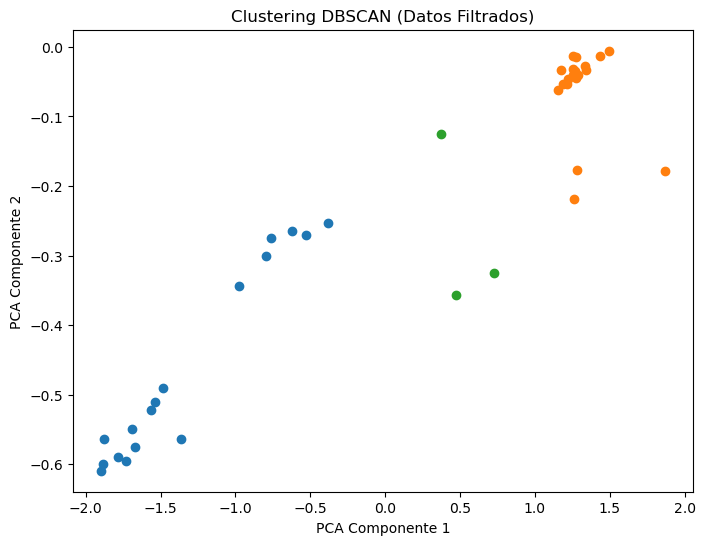

In [12]:
# Importar las bibliotecas necesarias
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_excel("C:/Users/monts/OneDrive/Escritorio/UAA/Inteligencia Artificial/VIH/dataset_VIH.xlsx")

X = dataset.drop(columns=["aminoacido", "clase", "sumatoria"])  # Solo usa las propiedades moleculares

# Normalizar los datos para mejorar la distribución
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir la dimensionalidad con PCA (2 componentes para visualización)
pca = PCA(n_components=2, random_state=42)
X_pca_scaled = pca.fit_transform(X_scaled)

X = X.fillna(0)  # Reemplaza valores nulos con 0

# Aplicar DBSCAN con parámetros base
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_pca_scaled)

# Verificar si hay múltiples clústeres y calcular la puntuación de Silhouette
if len(set(dbscan_clusters)) > 1:
    silhouette_dbscan = silhouette_score(X_pca_scaled, dbscan_clusters)
else:
    silhouette_dbscan = "No es posible calcular (1 solo clúster)"

print("Puntuación de Silhouette para DBSCAN:", silhouette_dbscan)
print("Clústeres detectados:", set(dbscan_clusters))

# Filtrar los datos eliminando los atípicos (ajustar rangos según los datos)
filtered_indices = np.where(
    (X_pca_scaled[:, 0] > -2) & (X_pca_scaled[:, 0] < 2) &
    (X_pca_scaled[:, 1] > -1) & (X_pca_scaled[:, 1] < 1)
)
filtered_data = X_pca_scaled[filtered_indices]
filtered_clusters = dbscan_clusters[filtered_indices]

# Verificar cuántos datos se conservaron
print("Datos antes del filtrado:", X_pca_scaled.shape[0])
print("Datos después del filtrado:", filtered_data.shape[0])

# Graficar los datos filtrados
plt.figure(figsize=(8, 6))
for cluster_id in set(filtered_clusters):
    cluster_points = filtered_data[filtered_clusters == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Clúster {cluster_id}")
plt.title("Clustering DBSCAN (Datos Filtrados)")
plt.xlabel("PCA Componente 1")
plt.ylabel("PCA Componente 2")
plt.show()

